In [3]:
import face_recognition
import argparse
import numpy as np
import os.path
import cv2 

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [3]:
img_path = '2400_CRS_37_02.jpg'
image = face_recognition.load_image_file(img_path)
face_locations = face_recognition.face_locations(image, model = 'cnn')
face_locations

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\king7\\OneDrive\\바탕 화면\\KHU\\CV_Project\\Project-Arcface\\preprocessing\\2400_CRS_37_02.jpg'

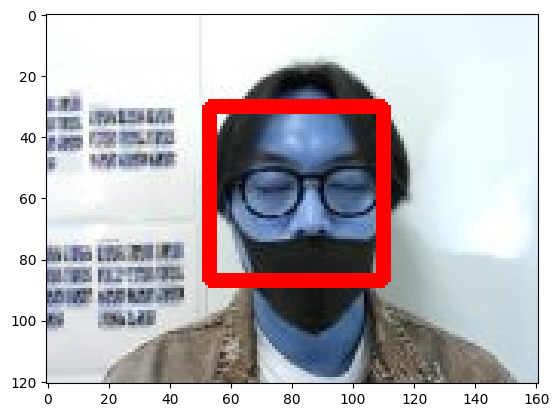

In [11]:
for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(image, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", image)

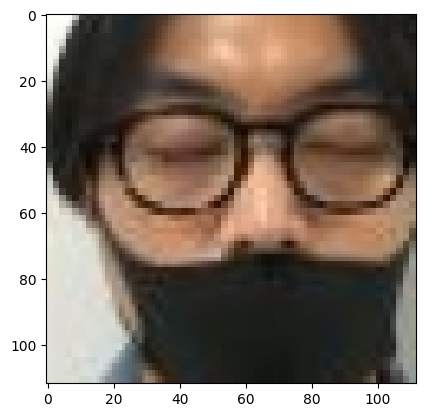

In [12]:
img = cv2.imread(img_path, 1)
copy_img = img.copy()

face_locations = face_recognition.face_locations(img, model='cnn')

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  


crop_img = copy_img[top:bottom, left:right]
resize_img = cv2.resize(crop_img, dsize=(112,112), interpolation = cv2.INTER_AREA)
imshow('', resize_img)


In [1]:
old_dir = 'data/k-face/new_path/train'
new_dir = 'data/k-face/new_path/rename_train_align_112'

In [4]:
old_dir_list = os.listdir(old_dir)
len(old_dir_list)

400

In [5]:
for root, dirs, files in os.walk(old_dir):
    if root == old_dir:
        continue  # 첫 번째 레벨에서는 루프를 건너뜁니다.
    
    people_name = os.path.split(root)[1]
    print(people_name)
    new_people_dir = os.path.join(new_dir, people_name)
    
    try:
        os.makedirs(new_people_dir)
    except Exception as err:
        print(err)
        
    # 얼굴 인식 및 저장
    for i, file in enumerate(files):
        input_image_path = os.path.join(root, file)
        original_image = cv2.imread(input_image_path, 1)
        if original_image is not None:
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            copy_image = original_image
            face_locations = face_recognition.face_locations(original_image)

            for face_location in face_locations:
                # 얼굴 박스 크기를 일반 박스보다 더 크게 조정
                top, right, bottom, left = face_location
                top -= 30
                right += 30
                bottom += 30
                left -= 30
                
                crop_image = copy_image[top:bottom, left:right]
                
                # 잘린 이미지가 비어 있지 않은지 확인합니다.
                if crop_image.size == 0:
                    continue
                
                resize_image = cv2.resize(crop_image, dsize=(112, 112), interpolation=cv2.INTER_AREA)
                resize_image = cv2.cvtColor(resize_image, cv2.COLOR_RGB2BGR)
                save_path = os.path.join(new_people_dir, file)  # 원래 파일 이름으로 저장 경로 설정
                cv2.imwrite(save_path, resize_image)

2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
